#### ANÁLISE DOS DADOS DE CANCELAMENTO DE MATRÍCULA DE UMA UNIVERSIDADE ####

In [120]:
# importações

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [121]:
# Carregando a base de dados
df_cancelamentos = pd.read_excel(r'C:\projetos\analise-de-cancelamentos-de-matriculas\dados\base-de-dados.xlsx')

In [122]:
# visualizando uma amostra dos dados
df_cancelamentos.sample(5)

,data_protocolo,sexo,data_nascimento,campus,motivo_cancelamento,curso,area,tipo_ingresso,pontuacao,ano_ingresso,grupo
115,2024-12-29,Feminino,1996-01-07,Salvador,Não especificado,66A - BACHARELADO INTERDISCIPLINAR EM ARTES E ...,Humanas,PAS,745.70,2018,GRUPO E
106,2022-07-18,Feminino,2002-05-22,Juiz de Fora,Outros,01ABI - ABI - CIÊNCIAS BIOLÓGICAS,Humanas,PAS,508.93,2022,GRUPO E
196,2020-07-21,Feminino,1979-07-01,Rio de Janeiro,Dificuldade de conciliar trabalho com estudo,07A - FARMÁCIA,Saúde,SISU,752.77,2023,GRUPO A
412,2022-08-27,Masculino,1999-11-09,Salvador,Problema de saúde,29LES - LETRAS,Humanas,Nova Modalidade/Habilitação,603.19,2022,Não Aplicável
321,2024-02-03,Masculino,1983-07-17,Juiz de Fora,Dificuldade de conciliar trabalho com estudo,04GV - DIREITO,Humanas,SISU,505.33,2023,GRUPO C


In [123]:
# separando os dados da coluna curso
df_cancelamentos[['codigo', 'curso']] = df_cancelamentos['curso'].str.split(' - ', n = 1, expand=True)

In [124]:
# verificando os tipos de dados
df_cancelamentos.dtypes

data_protocolo         datetime64[ns]
sexo                           object
data_nascimento        datetime64[ns]
campus                         object
motivo_cancelamento            object
curso                          object
area                           object
tipo_ingresso                  object
pontuacao                     float64
ano_ingresso                    int64
grupo                          object
codigo                         object
dtype: object

In [125]:
# Verificando os valores únicos da variável sexo
print(f"Itens únicos de SEXO: {df_cancelamentos['sexo'].unique()}")

Itens únicos de SEXO: ['Masculino' 'Feminino']


In [126]:
# Verificando os valores únicos da variável campus
print(f"Itens únicos de CAMPUS: {df_cancelamentos['campus'].unique()}")

Itens únicos de CAMPUS: ['Rio de Janeiro' 'Juiz de Fora' 'Salvador' 'São Paulo']


In [127]:
# Verificando os valores únicos da variável grupo
print(f"Itens únicos de GRUPO: {df_cancelamentos['grupo'].unique()}")

Itens únicos de GRUPO: ['GRUPO A' 'GRUPO C' 'GRUPO B' 'GRUPO D' 'GRUPO E' 'Não Aplicável'
 'GRUPO H' 'GRUPO J' 'GRUPO C ' 'GRUPO E ' 'GRUPO D ' 'GRUPO A ']


In [128]:
# Verificando os valores únicos da variável grupo
print(f"Itens únicos de MOTIVO DO CANCELAMENTO: {df_cancelamentos['motivo_cancelamento'].unique()}")

Itens únicos de MOTIVO DO CANCELAMENTO: ['Outros' 'Dificuldade de morar longe da família' 'Má qualidade do curso'
 'Não especificado' 'Dificuldades financeiras'
 'Falta de identificação e/ou interesse pelo curso'
 'Expressa manifestação de vontade' 'Infraestrutura do Campus'
 'Horário das aulas'
 'Falta de matrícula em disciplina durante um semestre'
 'Dificuldade de conciliar trabalho com estudo' 'Problema de saúde'
 'Problema de relacionamento com estudantes e/ou docentes']


In [129]:
# Verificando os valores únicos da variável tipo_ingresso
print(f"Itens únicos de TIPO DE INGRESSO: {df_cancelamentos['tipo_ingresso'].unique()}")

Itens únicos de TIPO DE INGRESSO: ['SISU' 'VESTIBULAR' 'PAS'
 'Opcao segundo ciclo do B. I.  em Ciencias Humanas'
 'Matrícula como Graduado'
 'Opcao segundo ciclo do B. I.  em Artes de Design' 'Transferência'
 'Nova Modalidade/Habilitação'
 'Opcao segundo ciclo do Bacharelado Ciencias Exatas' 'Mudança de Curso']


In [130]:
# Verificando os valores únicos da variável ano_ingresso
print(f"Itens únicos de ANO DE INGRESSO: {df_cancelamentos['ano_ingresso'].unique()}")

Itens únicos de ANO DE INGRESSO: [2022 2011 2012 2019 2020 2018 2021 2016 2023 2024 2015 2017 2013 2010
 2014]


In [131]:
# verificando quantos registros e variáveis presentes
df_cancelamentos.shape

(1550, 12)

In [132]:
# verificando se existem valores ausentes
df_cancelamentos.isnull().sum()

data_protocolo         0
sexo                   0
data_nascimento        0
campus                 0
motivo_cancelamento    0
curso                  0
area                   0
tipo_ingresso          0
pontuacao              0
ano_ingresso           0
grupo                  0
codigo                 0
dtype: int64

## Analisando os dados dos cancelamentos de matrícula

#### Perfil dos Estudantes que Cancelaram a Matrícula de graduação


In [133]:
# Distribuição por Sexo: Percentual de cancelamentos por sexo
contagem_sexo = df_cancelamentos['sexo'].value_counts()
total_sexo = contagem_sexo.sum()
percentual_sexo = (contagem_sexo / total_sexo) * 100

print(f'Percentual: {contagem_sexo}')
print(f'\nContagem: {percentual_sexo}')


Percentual: sexo
Feminino     824
Masculino    726
Name: count, dtype: int64

Contagem: sexo
Feminino     53.16129
Masculino    46.83871
Name: count, dtype: float64


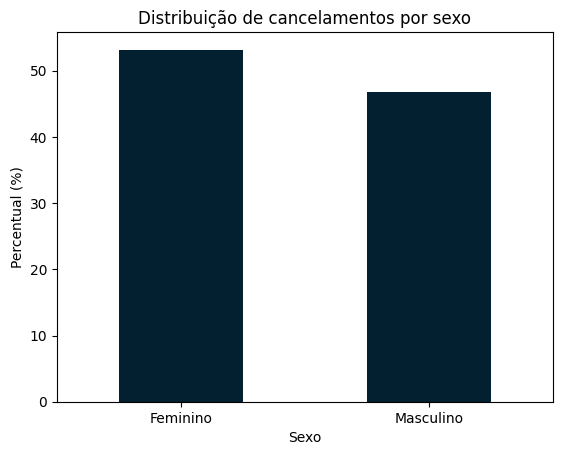

In [134]:
# Gráfico da Distribuição de cancelamento por sexo
percentual_sexo.plot(kind= 'bar',color='#032030')
plt.title('Distribuição de cancelamentos por sexo')
plt.xlabel('Sexo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.show()

In [135]:
## CONCLUSÕES
# Podemos concluir, de acordo com a análise, que alunos do sexo feminino (cerca de 53%)  solicitaram o cancelamento das sua matrícula.

In [136]:
# Analisando se estudantes de ingressos mais recentes ou mais antigos têm maior propensão ao cancelamento

df_ano = df_cancelamentos['ano_ingresso']
print(df_cancelamentos['ano_ingresso'].value_counts().sort_values(ascending=False))

ano_ingresso
2023    442
2022    322
2024    168
2021    156
2020    140
2019     77
2018     74
2017     53
2016     35
2015     30
2014     18
2012     12
2013     11
2011      7
2010      5
Name: count, dtype: int64


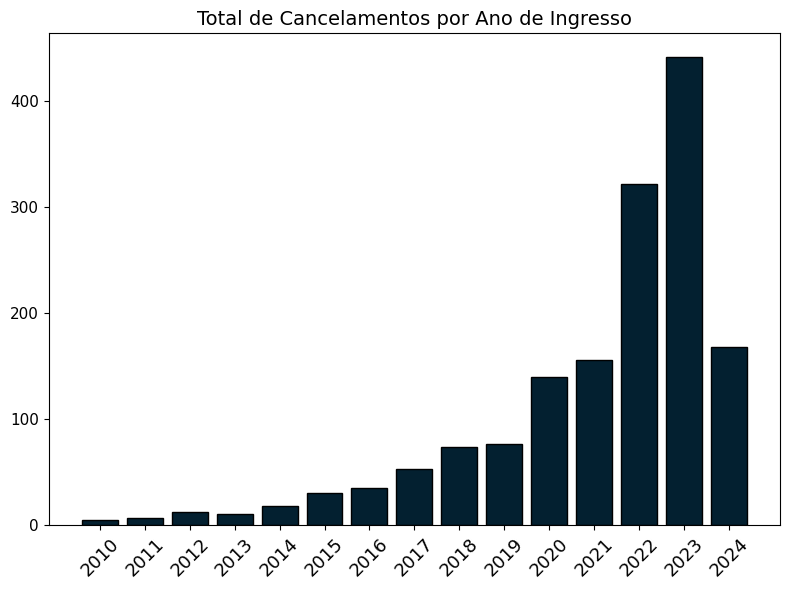

In [137]:
# Contar os cancelamentos por ano
cancelamentos_por_ano_ingresso = df_ano.value_counts().sort_index()

# Dados para o gráfico
x = cancelamentos_por_ano_ingresso.index  # Anos
y = cancelamentos_por_ano_ingresso.values  # Quantidade de cancelamentos por ano

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Total de Cancelamentos por Ano de Ingresso', fontsize=14)
#plt.xlabel('Ano de ingresso', fontsize=13)
#plt.ylabel('Cancelamentos', fontsize=14)
plt.xticks(x, rotation=45, fontsize=13)
plt.yticks(fontsize=11)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [138]:
## CONCLUSÕES
# Podemos observar um aumento progressivo de acordo com o ano de ingresso, culminando no ano de 2023, onde aconteceram 442 pedidos. 
# Um aumento de cerca de 37% em relação as pessoas que ingressaram no ano anterior

#### Análisando a quantidade de cancelamentos por idade 

In [139]:
# coletando dados da data atual
data_atual = datetime.now()
ano_atual = data_atual.year

In [140]:
# Transformando o tipo da variável ano_nascimento para data e criando a variável idade
df_cancelamentos['idade'] = ano_atual - pd.to_datetime(df_cancelamentos['data_nascimento'],format="%d/%m/%Y").dt.year 
df_cancelamentos.head()

,data_protocolo,sexo,data_nascimento,campus,motivo_cancelamento,curso,area,tipo_ingresso,pontuacao,ano_ingresso,grupo,codigo,idade
0,2024-12-30,Masculino,1986-07-11,Rio de Janeiro,Outros,CIÊNCIAS ECONÔMICAS,Humanas,SISU,498.67,2022,GRUPO A,03GV,39
1,2024-11-17,Masculino,1982-02-07,Juiz de Fora,Dificuldade de morar longe da família,TURISMO,Humanas,SISU,517.58,2022,GRUPO C,93A,43
2,2024-12-14,Feminino,2007-04-07,Juiz de Fora,Má qualidade do curso,BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS,Humanas,SISU,422.18,2022,GRUPO B,72A,18
3,2024-12-28,Masculino,1989-12-29,Juiz de Fora,Não especificado,GEOGRAFIA,Humanas,VESTIBULAR,713.18,2011,GRUPO C,10A,36
4,2023-08-22,Feminino,2000-05-18,Salvador,Dificuldade de morar longe da família,MEDICINA,Saúde,SISU,642.73,2012,GRUPO C,07GV,25


In [141]:
# Transformando o tipo da variável data_protocolo para data e criando a variável ano_protocolado
df_cancelamentos['ano_protocolado'] = pd.to_datetime(df_cancelamentos['data_protocolo'],format="%d/%m/%Y").dt.year
df_cancelamentos.head()

,data_protocolo,sexo,data_nascimento,campus,motivo_cancelamento,curso,area,tipo_ingresso,pontuacao,ano_ingresso,grupo,codigo,idade,ano_protocolado
0,2024-12-30,Masculino,1986-07-11,Rio de Janeiro,Outros,CIÊNCIAS ECONÔMICAS,Humanas,SISU,498.67,2022,GRUPO A,03GV,39,2024
1,2024-11-17,Masculino,1982-02-07,Juiz de Fora,Dificuldade de morar longe da família,TURISMO,Humanas,SISU,517.58,2022,GRUPO C,93A,43,2024
2,2024-12-14,Feminino,2007-04-07,Juiz de Fora,Má qualidade do curso,BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS,Humanas,SISU,422.18,2022,GRUPO B,72A,18,2024
3,2024-12-28,Masculino,1989-12-29,Juiz de Fora,Não especificado,GEOGRAFIA,Humanas,VESTIBULAR,713.18,2011,GRUPO C,10A,36,2024
4,2023-08-22,Feminino,2000-05-18,Salvador,Dificuldade de morar longe da família,MEDICINA,Saúde,SISU,642.73,2012,GRUPO C,07GV,25,2023


In [142]:
# Alterando o tipo da variável ano_protocolado
df_cancelamentos['idade'] = df_cancelamentos['idade'].astype(str)

In [143]:
# contagem de cancelamentos por idade
cancelamentos_por_idade = df_cancelamentos['idade'].value_counts()
cancelamentos_por_idade.head(10)

idade
18    181
19    119
25     80
24     62
23     61
22     59
26     56
27     55
33     52
46     51
Name: count, dtype: int64

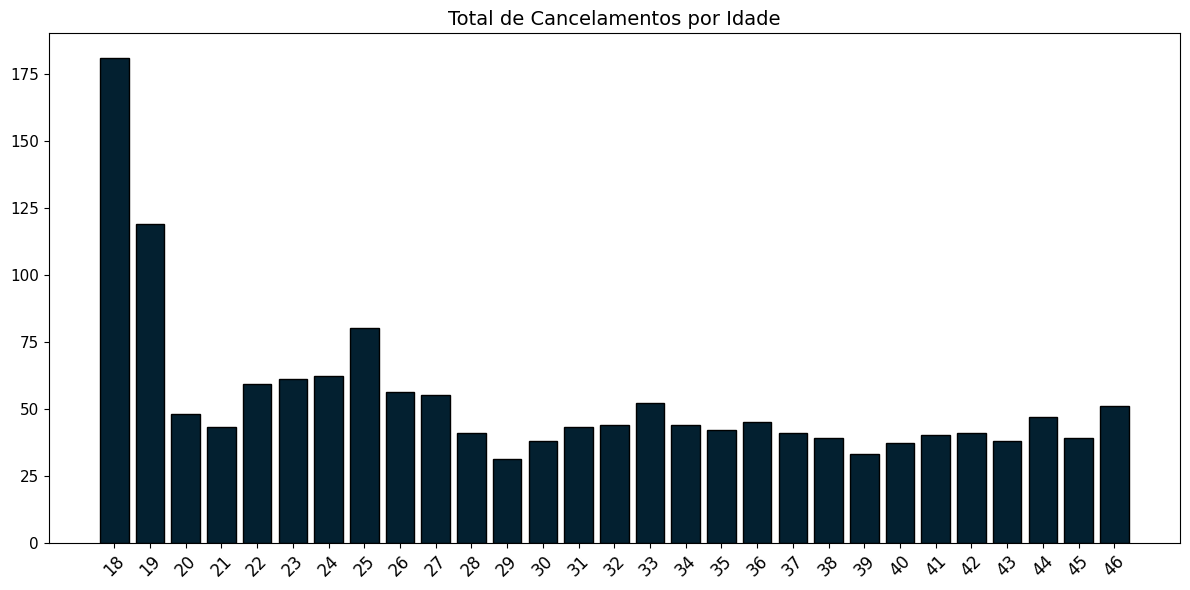

In [144]:
# Contar os cancelamentos por ano de solicitação
cancelamentos_por_idade = df_cancelamentos['idade'].value_counts().sort_index()

# Dados para o gráfico
x = cancelamentos_por_idade.index  # Anos
y = cancelamentos_por_idade.values  # Quantidade de cancelamentos por ano

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Total de Cancelamentos por Idade', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=11)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [145]:
## CONCLUSÔES
# Podemos concluir que os alunos que pediram mais cancelamentos são os alunos mais novos - 18 anos, seguidos os de 19 anos

### Qual o tipo de ingresso mais comum entre os alunos que cancelam?


In [146]:
df_cancelamentos.groupby(['tipo_ingresso']).size().sort_values(ascending=False)

tipo_ingresso
SISU                                                  915
PAS                                                   405
VESTIBULAR                                            139
Matrícula como Graduado                                23
Nova Modalidade/Habilitação                            18
Opcao segundo ciclo do B. I.  em Ciencias Humanas      17
Opcao segundo ciclo do B. I.  em Artes de Design       16
Opcao segundo ciclo do Bacharelado Ciencias Exatas      8
Transferência                                           8
Mudança de Curso                                        1
dtype: int64

In [147]:
# CONCLUSÕES
# Verificamos que ingressante pelo SISU possuem mais que o dobro de cancelamentos pdo que o segundo que é o PAS

#### Analisando a quantidade de cancelamentos por ano de solicitação

In [148]:
# Alterando o tipo da variável ano_protocolado
df_cancelamentos['ano_protocolado'] = df_cancelamentos['ano_protocolado'].astype(str)

In [149]:
# contagem de cancelamentos por ano de solicitação
cancelamentos_por_ano_protocolado = df_cancelamentos['ano_protocolado'].value_counts()
cancelamentos_por_ano_protocolado

ano_protocolado
2023    361
2021    315
2022    302
2024    296
2020    276
Name: count, dtype: int64

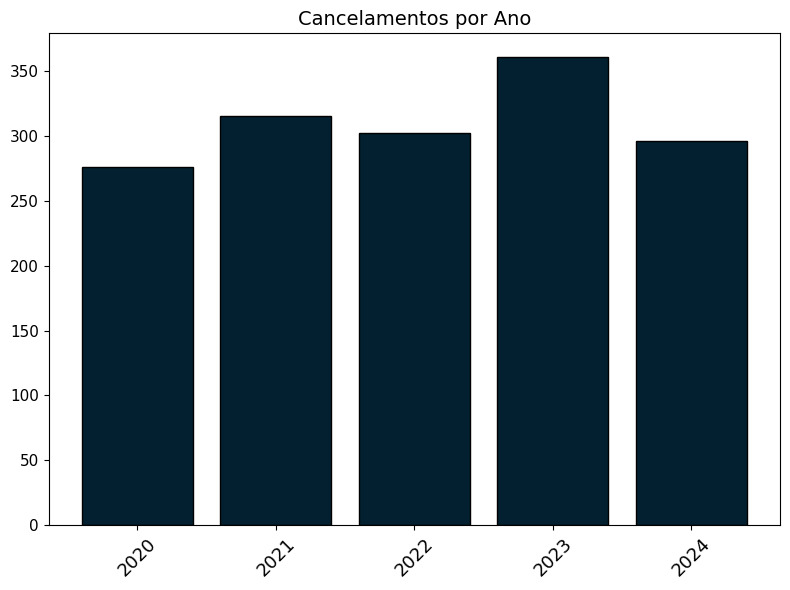

In [150]:
# Contar os cancelamentos por ano de solicitação
cancelamentos_por_ano_protocolado = df_cancelamentos['ano_protocolado'].value_counts().sort_index()

# Dados para o gráfico
x = cancelamentos_por_ano_protocolado.index  # Anos
y = cancelamentos_por_ano_protocolado.values  # Quantidade de cancelamentos por ano

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Cancelamentos por Ano', fontsize=14)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=11)
plt.tight_layout()

# Exibir o gráfico
plt.show()

### Cancelamento por Campus

In [151]:
# Verificando a quantidade de cancelamentos por Campus
df_cancelamentos['campus'].value_counts()

campus
Juiz de Fora      824
Salvador          270
Rio de Janeiro    236
São Paulo         220
Name: count, dtype: int64

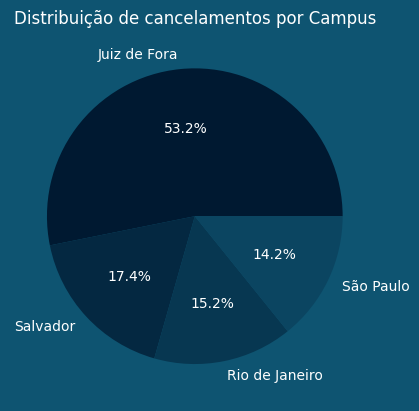

In [152]:
contagem_cidades = df_cancelamentos['campus'].value_counts()

# Mudar a cor do plano de fundo diretamente
plt.gcf().set_facecolor('#0e5471')  # Cor de fundo (exemplo: azul claro)

plt.pie(contagem_cidades, labels=contagem_cidades.index, colors=['#001931','#042841','#073751','#0b4561'], autopct= '%1.1f%%', textprops={'color':'white'})
plt.title('Distribuição de cancelamentos por Campus',color = 'white')
plt.show()

#### Análise de acordo com as Razões para o Cancelamento

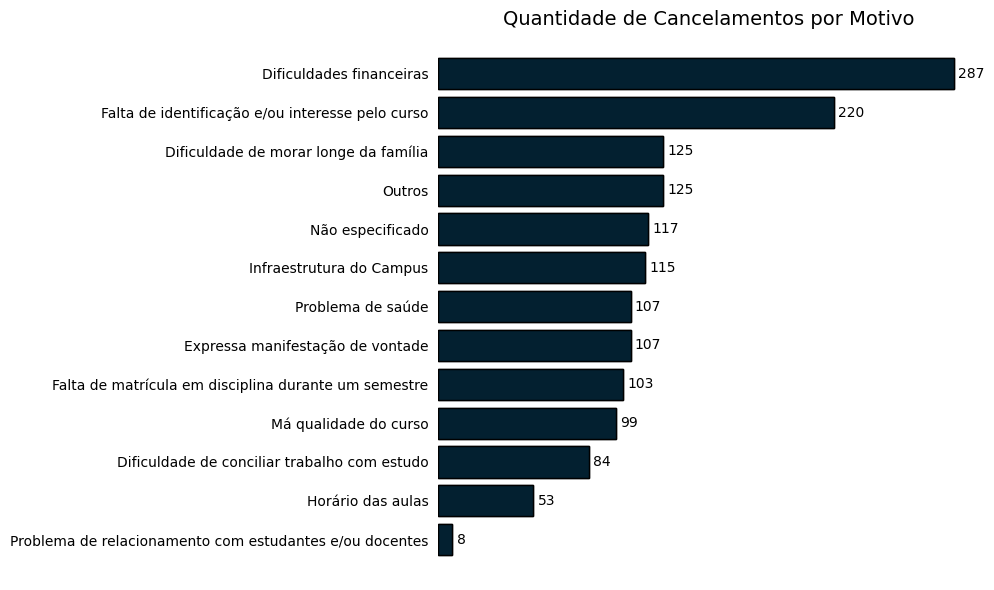

In [153]:
# Contando os cancelamentos por motivo
cancelamentos_por_motivo = df_cancelamentos['motivo_cancelamento'].value_counts()

# Ordenar pela quantidade de cancelamentos em ordem decrescente
cancelamentos_por_motivo = cancelamentos_por_motivo.sort_values(ascending=True)

# Dados para o gráfico
x = cancelamentos_por_motivo.index  # Motivos
y = cancelamentos_por_motivo.values  # Quantidade de cancelamentos por motivo

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Quantidade de Cancelamentos por Motivo', fontsize=14, loc='center')
plt.xlabel('Quantidade', fontsize=13)
#plt.ylabel('Motivos', fontsize=13)

bars = plt.barh(x, y, color='#032030', edgecolor='black')

# Adicionar rótulos de dados diretamente nas barras
plt.bar_label(bars, fmt='%d', padding=3, fontsize=10, label_type='edge')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_ticks_position('none')


plt.tight_layout()

# Exibir o gráfico
plt.show()


In [154]:
## CONCLUSÕES
# Através do gráfico, verificamos que a grande maioria das pessoas solicitou o cancelamento por questões financeiras

### Motivos de cancelamentos  por Campus

In [155]:
# Motivos por Campus - Juiz de Fora
df_razoes_campus_jf = df_cancelamentos[df_cancelamentos['campus'] == 'Juiz de Fora'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_campus_jf.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento por Campus - Juiz de Fora</h3>{df_razoes_campus_jf.to_html(index=False)}"))

Motivos para o cancelamento,Total
Dificuldades financeiras,151
Falta de identificação e/ou interesse pelo curso,118
Dificuldade de morar longe da família,67
Não especificado,67
Outros,65
Infraestrutura do Campus,59
Problema de saúde,58
Expressa manifestação de vontade,57
Falta de matrícula em disciplina durante um semestre,56
Má qualidade do curso,56


In [156]:
# Motivos por Campus - Rio de Janeiro
df_razoes_campus_rj = df_cancelamentos[df_cancelamentos['campus'] == 'Rio de Janeiro'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_campus_rj.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento por Campus - Rio de Janeiro</h3>{df_razoes_campus_rj.to_html(index=False)}"))

Motivos para o cancelamento,Total
Dificuldades financeiras,42
Falta de identificação e/ou interesse pelo curso,32
Outros,28
Infraestrutura do Campus,20
Dificuldade de morar longe da família,18
Não especificado,18
Problema de saúde,16
Expressa manifestação de vontade,14
Dificuldade de conciliar trabalho com estudo,14
Má qualidade do curso,13


In [157]:
# Motivos por Campus - São Paulo
df_razoes_campus_sp = df_cancelamentos[df_cancelamentos['campus'] == 'São Paulo'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_campus_sp.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento por Campus - São Paulo</h3>{df_razoes_campus_sp.to_html(index=False)}"))

Motivos para o cancelamento,Total
Dificuldades financeiras,46
Falta de identificação e/ou interesse pelo curso,30
Expressa manifestação de vontade,20
Falta de matrícula em disciplina durante um semestre,20
Infraestrutura do Campus,18
Outros,16
Má qualidade do curso,14
Não especificado,13
Dificuldade de morar longe da família,13
Problema de saúde,12


In [158]:
# Razões por Campus - Salvador
df_razoes_campus_salvador = df_cancelamentos[df_cancelamentos['campus'] == 'Salvador'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_campus_salvador.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento por Campus - Salvador</h3>{df_razoes_campus_salvador.to_html(index=False)}"))

Motivos para o cancelamento,Total
Dificuldades financeiras,48
Falta de identificação e/ou interesse pelo curso,40
Dificuldade de morar longe da família,27
Problema de saúde,21
Falta de matrícula em disciplina durante um semestre,19
Não especificado,19
Dificuldade de conciliar trabalho com estudo,18
Infraestrutura do Campus,18
Expressa manifestação de vontade,16
Outros,16


In [159]:
# CONCLUSÔES
# Independente do campus, os motivos predominantes são Dificuldades financeiras e Falta de identificação ou interesse pelo curso

#### Análise do cancelamento por Área de estudos

In [160]:
# Verificando a quantidade de cancelamentos por Campus
df_cancelamentos['area'].value_counts()

area
Humanas    720
Exatas     451
Saúde      379
Name: count, dtype: int64

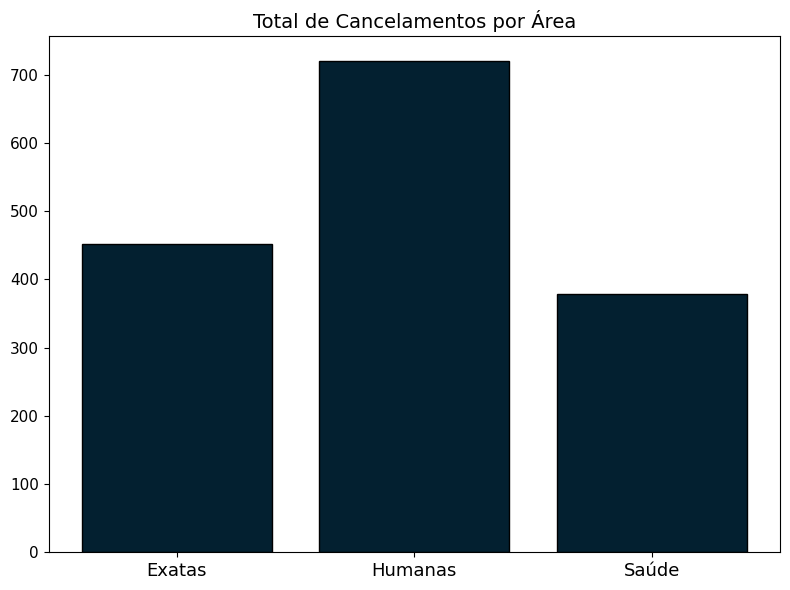

In [161]:
# Contar os cancelamentos por Área
cancelamentos_por_area = df_cancelamentos['area'].value_counts().sort_index()

# Dados para o gráfico
x = cancelamentos_por_area.index  # Anos
y = cancelamentos_por_area.values  # Quantidade de cancelamentos por ano

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Total de Cancelamentos por Área', fontsize=14)
#plt.ylabel('Quantidade de Cancelamentos', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [162]:
# Cancelamentos por Curso - Top 10 - Humanas
df_razoes_area_humanas = df_cancelamentos[df_cancelamentos['area'] == 'Humanas'].groupby(['curso']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_humanas.rename(columns={'curso':'Curso','total':'Total'}, inplace=True)
# Exibir com título
display(HTML(f"<h3>Top 10 Cursos com mais cancelamentos - Área de Humanas</h3>{df_razoes_area_humanas.head(10).to_html(index=False)}"))

Curso,Total
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS,102
DIREITO,98
CIÊNCIAS ECONÔMICAS,50
ADMINISTRAÇÃO,40
ODONTOLOGIA,36
LETRAS,34
GEOGRAFIA,29
CINEMA E AUDIOVISUAL,23
PEDAGOGIA,23
ABI - CIÊNCIAS BIOLÓGICAS,22


In [163]:
# Motivos por Área - Humanas
df_razoes_area_humanas = df_cancelamentos[df_cancelamentos['area'] == 'Humanas'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_humanas.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)
# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Área de Humanas</h3>{df_razoes_area_humanas.to_html(index=False)}"))

Motivos para o cancelamento,Total
Dificuldades financeiras,132
Falta de identificação e/ou interesse pelo curso,103
Outros,62
Infraestrutura do Campus,59
Dificuldade de morar longe da família,56
Expressa manifestação de vontade,52
Falta de matrícula em disciplina durante um semestre,50
Não especificado,49
Problema de saúde,48
Má qualidade do curso,48


In [164]:
# Cancelamentos por Curso - Top 10 - Exatas
df_razoes_area_exatas = df_cancelamentos[df_cancelamentos['area'] == 'Exatas'].groupby(['curso']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_exatas.rename(columns={'curso':'Curso','total':'Total'}, inplace=True)
# Exibir com título
display(HTML(f"<h3>Top 10 Cursos com mais cancelamentos - Área de Exatas</h3>{df_razoes_area_exatas.head(10).to_html(index=False)}"))

Curso,Total
CIÊNCIAS EXATAS,62
QUÍMICA,39
ENGENHARIA CIVIL,33
CIÊNCIA DA COMPUTAÇÃO,32
ENGENHARIA DE PRODUÇÃO,29
ENGENHARIA ELÉTRICA - SISTEMAS ELETRÔNICOS,22
FÍSICA,20
MATEMÁTICA,18
ENGENHARIA AMBIENTAL E SANITÁRIA,17
ENGENHARIA ELÉTRICA - ENERGIA,15


In [165]:
# Motivos por Área - Exatas
df_razoes_area_exatas = df_cancelamentos[df_cancelamentos['area'] == 'Exatas'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_exatas.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Área de Exatas</h3>{df_razoes_area_exatas.to_html(index=False)}"))

Motivos para o cancelamento,Total
Dificuldades financeiras,85
Falta de identificação e/ou interesse pelo curso,68
Dificuldade de morar longe da família,40
Outros,39
Não especificado,33
Problema de saúde,31
Expressa manifestação de vontade,29
Infraestrutura do Campus,29
Má qualidade do curso,27
Falta de matrícula em disciplina durante um semestre,25


In [166]:
# Cancelamentos por Curso - Top 10 - Saúde
df_razoes_area_saude = df_cancelamentos[df_cancelamentos['area'] == 'Saúde'].groupby(['curso']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_saude.rename(columns={'curso':'Curso','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Área de Saúde</h3>{df_razoes_area_saude.to_html(index=False)}"))

Curso,Total
MEDICINA,77
NUTRIÇÃO,69
FARMÁCIA,62
ODONTOLOGIA,49
ENFERMAGEM,35
FISIOTERAPIA,29
MEDICINA VETERINÁRIA,20
EDUCAÇÃO FÍSICA,14
CIÊNCIAS BIOLÓGICAS,12
EDUCAÇÃO FÍSICA - - PÓLO DE LAGOA SANTA,3


In [167]:
# Razões por Área - Saúde
df_razoes_area_saude = df_cancelamentos[df_cancelamentos['area'] == 'Saúde'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_saude.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Área de Saúde</h3>{df_razoes_area_saude.to_html(index=False)}"))

Motivos para o cancelamento,Total
Dificuldades financeiras,70
Falta de identificação e/ou interesse pelo curso,49
Não especificado,35
Dificuldade de morar longe da família,29
Falta de matrícula em disciplina durante um semestre,28
Problema de saúde,28
Infraestrutura do Campus,27
Expressa manifestação de vontade,26
Dificuldade de conciliar trabalho com estudo,25
Outros,24


#### Análise do cancelamento por Curso

In [168]:
# Motivos por Curso - Top 15
df_razoes_curso = df_cancelamentos[['curso','motivo_cancelamento']].groupby(['curso']).size().reset_index(name='total').sort_values(by=['total','curso'], ascending=[False,False])
df_razoes_curso.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total','curso':'Curso','area':'Área'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Top 15 Cursos com mais Solicitações de cancelamento</h3>{df_razoes_curso.head(15).to_html(index=False)}"))

Curso,Total
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS,102
DIREITO,98
ODONTOLOGIA,85
MEDICINA,77
NUTRIÇÃO,69
FARMÁCIA,62
CIÊNCIAS EXATAS,62
CIÊNCIAS ECONÔMICAS,50
ADMINISTRAÇÃO,40
QUÍMICA,39


In [169]:
# MOtivos por Curso levando em consideração os diferentes motivos - Top 15
df_razoes_curso = df_cancelamentos[['curso','motivo_cancelamento']].groupby(['curso','motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total','curso'], ascending=[False,False])
df_razoes_curso.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total','curso':'Curso','area':'Área'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Top 15 Cursos com mais Solicitações de cancelamento levando em consideração os diferentes motivos</h3>{df_razoes_curso.head(15).to_html(index=False)}"))

Curso,Motivos para o cancelamento,Total
DIREITO,Dificuldades financeiras,19
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS,Dificuldades financeiras,19
ODONTOLOGIA,Falta de identificação e/ou interesse pelo curso,17
NUTRIÇÃO,Dificuldades financeiras,15
MEDICINA,Dificuldades financeiras,14
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS,Falta de identificação e/ou interesse pelo curso,14
CIÊNCIAS EXATAS,Falta de identificação e/ou interesse pelo curso,13
DIREITO,Outros,12
NUTRIÇÃO,Não especificado,11
NUTRIÇÃO,Problema de saúde,11


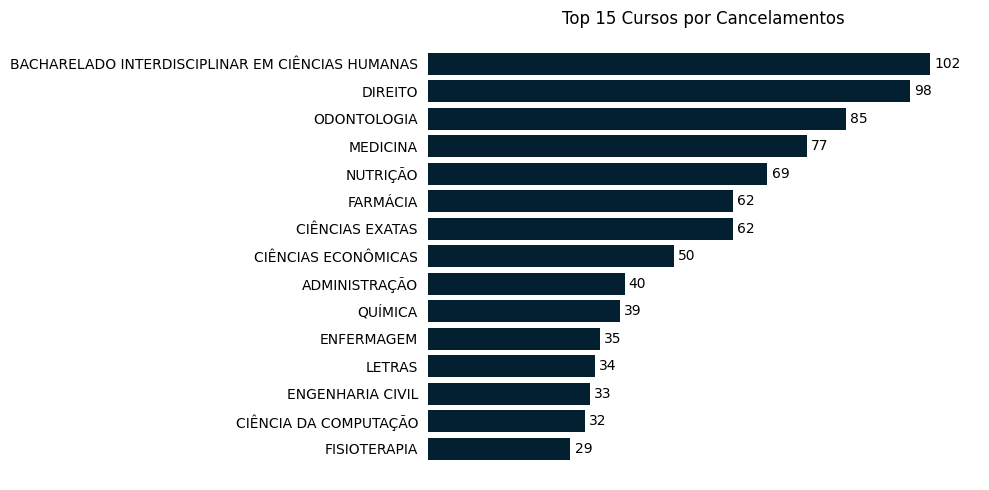

In [170]:
# Agrupar os dados e selecionar os 15 principais cursos com maior número de cancelamentos
top20_cancelamentos = (
    df_cancelamentos.groupby(['curso'])['curso']
    .count()
    .sort_values(ascending=False)
    .head(15)
)

# Criar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 5))  # Aumentar altura para melhor visualização
bar_container = ax.barh(top20_cancelamentos.index, top20_cancelamentos.values, color='#032030')

# Inverter a ordem das barras (maior para menor no topo)
ax.invert_yaxis()
ax.set_xticks([])
ax.tick_params(left=False, bottom=False)

# Remover as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Personalizar o gráfico
ax.set(
    title='Top 15 Cursos por Cancelamentos',
    xlim=(0, top20_cancelamentos.max() * 1.1)  # Ajustar o limite do eixo X para espaço extra
)
ax.bar_label(bar_container, fmt='{:,.0f}', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()


In [171]:
# CONCLUSÕES
# Verificamos que a área  dos alunos que mais solicitam cancelamento é àrea de Humanas sendo que nessa área os alunos que mais cancelam são dos cursos 
# de BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS, 	DIREITO	e CIÊNCIAS ECONÔMICAS

# Na área de Exatas, segundo colocado no ranking de mais cancelamentos os alunos que mais cancelam são dos cursos de CIÊNCIAS EXATAS, QUÍMICA e ENGENHARIA CIVIL	

# Finalmente, na área de saúde, os alunos que mais cancelam são dos cursos de MEDICINA, NUTRIÇÃO, FARMÁCIA


#### Análise do cancelamento por Grupo de Cotas

In [172]:
# retirando da tabela os registros cujo grupo está prenchidos como "Não se aplica"
df_cancelamentos_filtrada = df_cancelamentos.loc[df_cancelamentos['grupo'] != 'Não Aplicável',:]

In [173]:
# verificando quantos registro existentes há agora após a exclusão dos registros
df_cancelamentos_filtrada.shape[0]

1459

In [174]:
# verificando qual o total de registros agrupados por grupo 
df_cancelamentos_filtrada.groupby(['grupo']).size().sort_values(ascending=False).reset_index(name='total_registros')

,grupo,total_registros
0,GRUPO C,823
1,GRUPO E,158
2,GRUPO A,157
3,GRUPO B,142
4,GRUPO D,139
5,GRUPO C,20
6,GRUPO E,7
7,GRUPO J,5
8,GRUPO H,5
9,GRUPO D,2


In [175]:
# CONCLUSÕES
# Verificamos que o grupo que apresentou expressivamente mais solicitações de cancelamento foi o Grupo C - Ampla concorrência, independentemente da declaração de renda, de escola, 
# de cor ou de origem racial seguido do Grupo E - Candidatos (as) que independentemente da renda tenham cursado integralmente o ensino médio em escolas públicas e Grupo A - 
# Candidatos (as) autodeclarados (as) pretos (as), pardos(as) ou indígenas, com renda familiar bruta per capita igual ou inferior a um
# salário mínimo e que tenham cursado integralmente o ensino médio em escolas públicas

#### Análise do cancelamento por Tipo de ingresso

In [176]:
# verificando qual o total de registros agrupados por grupo e por tipo de ingresso
df_cancelamentos.groupby('tipo_ingresso').size().sort_values(ascending=False).reset_index(name='total_registros')

,tipo_ingresso,total_registros
0,SISU,915
1,PAS,405
2,VESTIBULAR,139
3,Matrícula como Graduado,23
4,Nova Modalidade/Habilitação,18
5,Opcao segundo ciclo do B. I. em Ciencias Humanas,17
6,Opcao segundo ciclo do B. I. em Artes de Design,16
7,Opcao segundo ciclo do Bacharelado Ciencias Ex...,8
8,Transferência,8
9,Mudança de Curso,1


In [177]:
# verificando qual o total de registros agrupados por grupo e por tipo de ingresso
df_cancelamentos_filtrada.groupby(['tipo_ingresso','grupo']).size().sort_values(ascending=False).reset_index(name='total_registros')

,tipo_ingresso,grupo,total_registros
0,SISU,GRUPO C,525
1,PAS,GRUPO C,230
2,SISU,GRUPO A,122
3,SISU,GRUPO D,100
4,SISU,GRUPO B,88
5,PAS,GRUPO E,77
6,SISU,GRUPO E,73
7,VESTIBULAR,GRUPO C,68
8,PAS,GRUPO B,41
9,PAS,GRUPO D,30


In [178]:
## CONCLUSÕES
# Os cancelamentos são dominados por alunos que ingressaram pelo SISU (915), seguido pelo PAS (405), indicando que esses processos seletivos 
# representam a maior parte das desistências. Vestibular (139) tem um volume menor, mas ainda relevante. As demais formas de ingresso possuem 
# números significativamente mais baixos, com destaque para Transferência (8), Mudança de Curso (1) e Nova Modalidade/Habilitação (18), 
# sugerindo que alunos que entram por essas vias tendem a permanecer mais na instituição. O alto número de cancelamentos via SISU e PAS pode 
# indicar desafios na adaptação desses alunos ao curso ou à universidade.

### FIM